<a href="https://colab.research.google.com/github/shubhankar-mern/MLBasicsLearn/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [14]:
!unzip "/content/kagglecatsanddogs_5340.zip" -d "/content/kaggle"

Streaming output truncated to the last 5000 lines.
  inflating: /content/kaggle/PetImages/Dog/5500.jpg  
  inflating: /content/kaggle/PetImages/Dog/5501.jpg  
  inflating: /content/kaggle/PetImages/Dog/5502.jpg  
  inflating: /content/kaggle/PetImages/Dog/5503.jpg  
  inflating: /content/kaggle/PetImages/Dog/5504.jpg  
  inflating: /content/kaggle/PetImages/Dog/5505.jpg  
  inflating: /content/kaggle/PetImages/Dog/5506.jpg  
  inflating: /content/kaggle/PetImages/Dog/5507.jpg  
  inflating: /content/kaggle/PetImages/Dog/5508.jpg  
  inflating: /content/kaggle/PetImages/Dog/5509.jpg  
  inflating: /content/kaggle/PetImages/Dog/551.jpg  
  inflating: /content/kaggle/PetImages/Dog/5510.jpg  
  inflating: /content/kaggle/PetImages/Dog/5511.jpg  
  inflating: /content/kaggle/PetImages/Dog/5512.jpg  
  inflating: /content/kaggle/PetImages/Dog/5513.jpg  
  inflating: /content/kaggle/PetImages/Dog/5514.jpg  
  inflating: /content/kaggle/PetImages/Dog/5515.jpg  
  inflating: /content/kaggle/Pet

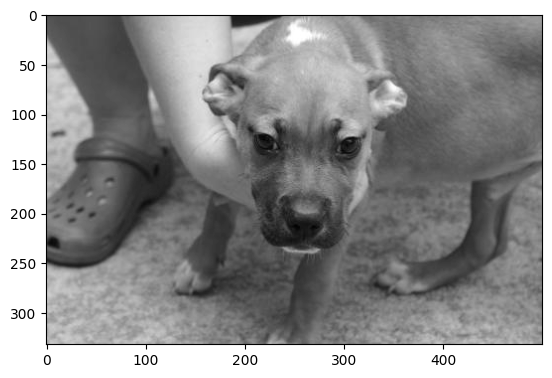

In [22]:
DATADIR= "/content/kaggle/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break  

In [21]:
print(img_array)

[[ 83  83  82 ... 153 153 152]
 [ 83  83  83 ... 152 152 152]
 [ 84  84  83 ... 151 151 151]
 ...
 [176 172 174 ... 155 158 160]
 [175 171 174 ... 150 153 155]
 [176 172 175 ... 147 149 152]]


In [20]:
img_array.shape

(332, 500)

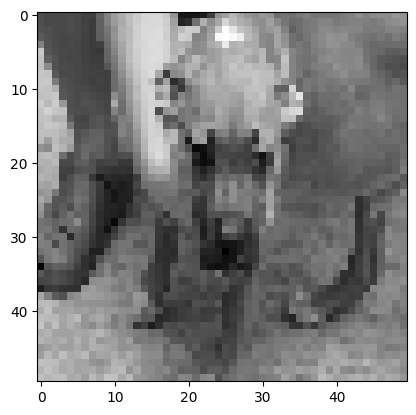

In [4]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, [IMG_SIZE, IMG_SIZE])
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, [IMG_SIZE, IMG_SIZE])
        training_data.append([new_array, class_num])
      except Exception as e:
        pass  
create_training_data()  

In [6]:
len(training_data)

24946

In [7]:
import random
random.shuffle(training_data)

In [8]:
for e in training_data[:1]:
  print(e)
  k = e

[array([[ 62,  71,  79, ...,  32,  63,  57],
       [ 75,  64,  71, ...,  29,  49,  49],
       [ 79,  74,  73, ...,  33,  61,  44],
       ...,
       [ 92,  98, 132, ..., 129, 123, 125],
       [118,  95, 113, ..., 110, 121, 111],
       [106, 125,  94, ..., 131, 125, 110]], dtype=uint8), 1]


In [9]:
k[0].shape

(50, 50)

In [24]:
X = []
y = []

In [25]:
for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)  


In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [44]:
## we have saved data in previous step
## now we will bring it back

In [14]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in) 

pickle_y = open("y.pickle", "rb")
y = pickle.load(pickle_y) 

In [15]:
X[2]

array([[[ 63],
        [ 60],
        [ 67],
        ...,
        [ 69],
        [213],
        [ 90]],

       [[ 61],
        [ 64],
        [ 74],
        ...,
        [ 66],
        [202],
        [ 89]],

       [[ 63],
        [ 66],
        [ 88],
        ...,
        [ 65],
        [158],
        [ 89]],

       ...,

       [[111],
        [112],
        [103],
        ...,
        [ 43],
        [ 45],
        [ 55]],

       [[104],
        [ 96],
        [ 86],
        ...,
        [141],
        [200],
        [248]],

       [[100],
        [ 99],
        [ 93],
        ...,
        [199],
        [225],
        [233]]], dtype=uint8)

In [16]:
y[2]

0

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D


In [29]:
X = X/255.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
X=np.array(X)
y=np.array(y)
model.fit(X,y,batch_size=32,epochs =3,validation_split=0.1)


Epoch 1/3
702/702 [==============================] - 134s 190ms/step - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 2/3
517/702 [=====================>........] - ETA: 33s - loss: 0.6932 - accuracy: 0.5013

KeyboardInterrupt: ignored